In [4]:
pip install keras tensorflow scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [60]:
df = pd.read_csv('/home/ariyaman/learntocode/Stockipy/data/historical_stock_data_AXIS.csv')

In [62]:
df

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-27,EQ,1310.00,1310.00,1280.00,1285.40,1288.05,1288.95,1293.09,1310.00,927.15,22311393,2.885058e+10,295852,AXISBANK
1,2024-06-26,EQ,1281.10,1292.95,1259.20,1271.45,1284.00,1285.40,1277.28,1292.95,927.15,13956370,1.782626e+10,252419,AXISBANK
2,2024-06-25,EQ,1234.45,1278.75,1226.00,1228.10,1272.65,1271.45,1259.63,1278.75,927.15,17607952,2.217949e+10,328365,AXISBANK
3,2024-06-24,EQ,1231.00,1235.75,1225.05,1237.45,1229.65,1228.10,1229.00,1246.00,927.15,6676530,8.205424e+09,199186,AXISBANK
4,2024-06-21,EQ,1246.00,1246.00,1223.75,1239.50,1232.10,1237.45,1229.24,1246.00,927.15,29311314,3.603051e+10,236969,AXISBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,2013-01-07,EQ,1385.00,1387.70,1365.50,1378.95,1366.00,1372.85,1374.90,1396.50,835.10,1143170,1.571740e+09,36901,AXISBANK
2851,2013-01-04,EQ,1382.45,1386.95,1370.00,1389.95,1377.25,1378.95,1378.26,1396.50,784.00,1252580,1.726378e+09,30409,AXISBANK
2852,2013-01-03,EQ,1394.00,1396.50,1383.25,1386.85,1390.00,1389.95,1390.26,1396.50,784.00,950039,1.320797e+09,36368,AXISBANK
2853,2013-01-02,EQ,1371.15,1394.40,1366.65,1362.70,1386.75,1386.85,1385.25,1394.40,784.00,1433645,1.985963e+09,65271,AXISBANK


In [63]:
df.info

<bound method DataFrame.info of             DATE SERIES     OPEN     HIGH      LOW  PREV. CLOSE      LTP  \
0     2024-06-27     EQ  1310.00  1310.00  1280.00      1285.40  1288.05   
1     2024-06-26     EQ  1281.10  1292.95  1259.20      1271.45  1284.00   
2     2024-06-25     EQ  1234.45  1278.75  1226.00      1228.10  1272.65   
3     2024-06-24     EQ  1231.00  1235.75  1225.05      1237.45  1229.65   
4     2024-06-21     EQ  1246.00  1246.00  1223.75      1239.50  1232.10   
...          ...    ...      ...      ...      ...          ...      ...   
2850  2013-01-07     EQ  1385.00  1387.70  1365.50      1378.95  1366.00   
2851  2013-01-04     EQ  1382.45  1386.95  1370.00      1389.95  1377.25   
2852  2013-01-03     EQ  1394.00  1396.50  1383.25      1386.85  1390.00   
2853  2013-01-02     EQ  1371.15  1394.40  1366.65      1362.70  1386.75   
2854  2013-01-01     EQ  1369.70  1371.50  1360.50      1356.55  1362.00   

        CLOSE     VWAP    52W H   52W L    VOLUME      

In [64]:
df.drop(['VOLUME','VALUE','NO OF TRADES','LTP'], axis=1, inplace=True)


In [65]:
df.info

<bound method DataFrame.info of             DATE SERIES     OPEN     HIGH      LOW  PREV. CLOSE    CLOSE  \
0     2024-06-27     EQ  1310.00  1310.00  1280.00      1285.40  1288.95   
1     2024-06-26     EQ  1281.10  1292.95  1259.20      1271.45  1285.40   
2     2024-06-25     EQ  1234.45  1278.75  1226.00      1228.10  1271.45   
3     2024-06-24     EQ  1231.00  1235.75  1225.05      1237.45  1228.10   
4     2024-06-21     EQ  1246.00  1246.00  1223.75      1239.50  1237.45   
...          ...    ...      ...      ...      ...          ...      ...   
2850  2013-01-07     EQ  1385.00  1387.70  1365.50      1378.95  1372.85   
2851  2013-01-04     EQ  1382.45  1386.95  1370.00      1389.95  1378.95   
2852  2013-01-03     EQ  1394.00  1396.50  1383.25      1386.85  1389.95   
2853  2013-01-02     EQ  1371.15  1394.40  1366.65      1362.70  1386.85   
2854  2013-01-01     EQ  1369.70  1371.50  1360.50      1356.55  1362.70   

         VWAP    52W H   52W L    SYMBOL  
0     1293.0

In [66]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values(by='DATE', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [67]:
df.head()


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,CLOSE,VWAP,52W H,52W L,SYMBOL
0,2013-01-01,EQ,1369.70,1371.50,1360.50,1356.55,1362.70,1365.40,1379.0,784.0,AXISBANK
1,2013-01-02,EQ,1371.15,1394.40,1366.65,1362.70,1386.85,1385.25,1394.4,784.0,AXISBANK
2,2013-01-03,EQ,1394.00,1396.50,1383.25,1386.85,1389.95,1390.26,1396.5,784.0,AXISBANK
3,2013-01-04,EQ,1382.45,1386.95,1370.00,1389.95,1378.95,1378.26,1396.5,784.0,AXISBANK
4,2013-01-07,EQ,1385.00,1387.70,1365.50,1378.95,1372.85,1374.90,1396.5,835.1,AXISBANK


In [68]:
df.duplicated().sum()


13

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df.isnull().sum().sum()


0

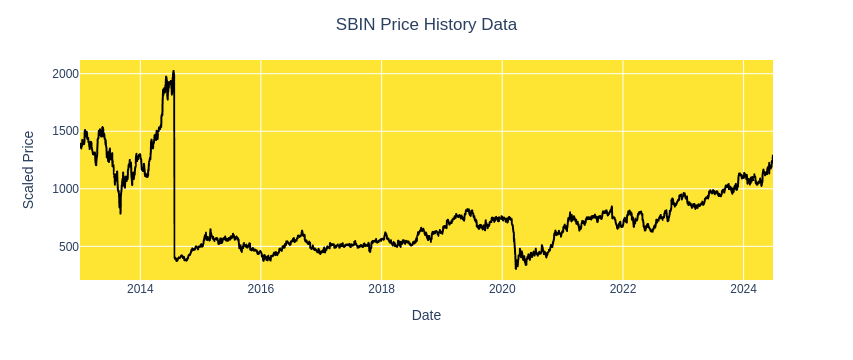

In [71]:
fig = px.line(y=df.CLOSE, x=df.DATE)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "AX Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [72]:
test_size = df[df.DATE.dt.year==2023].shape[0]
test_size

246

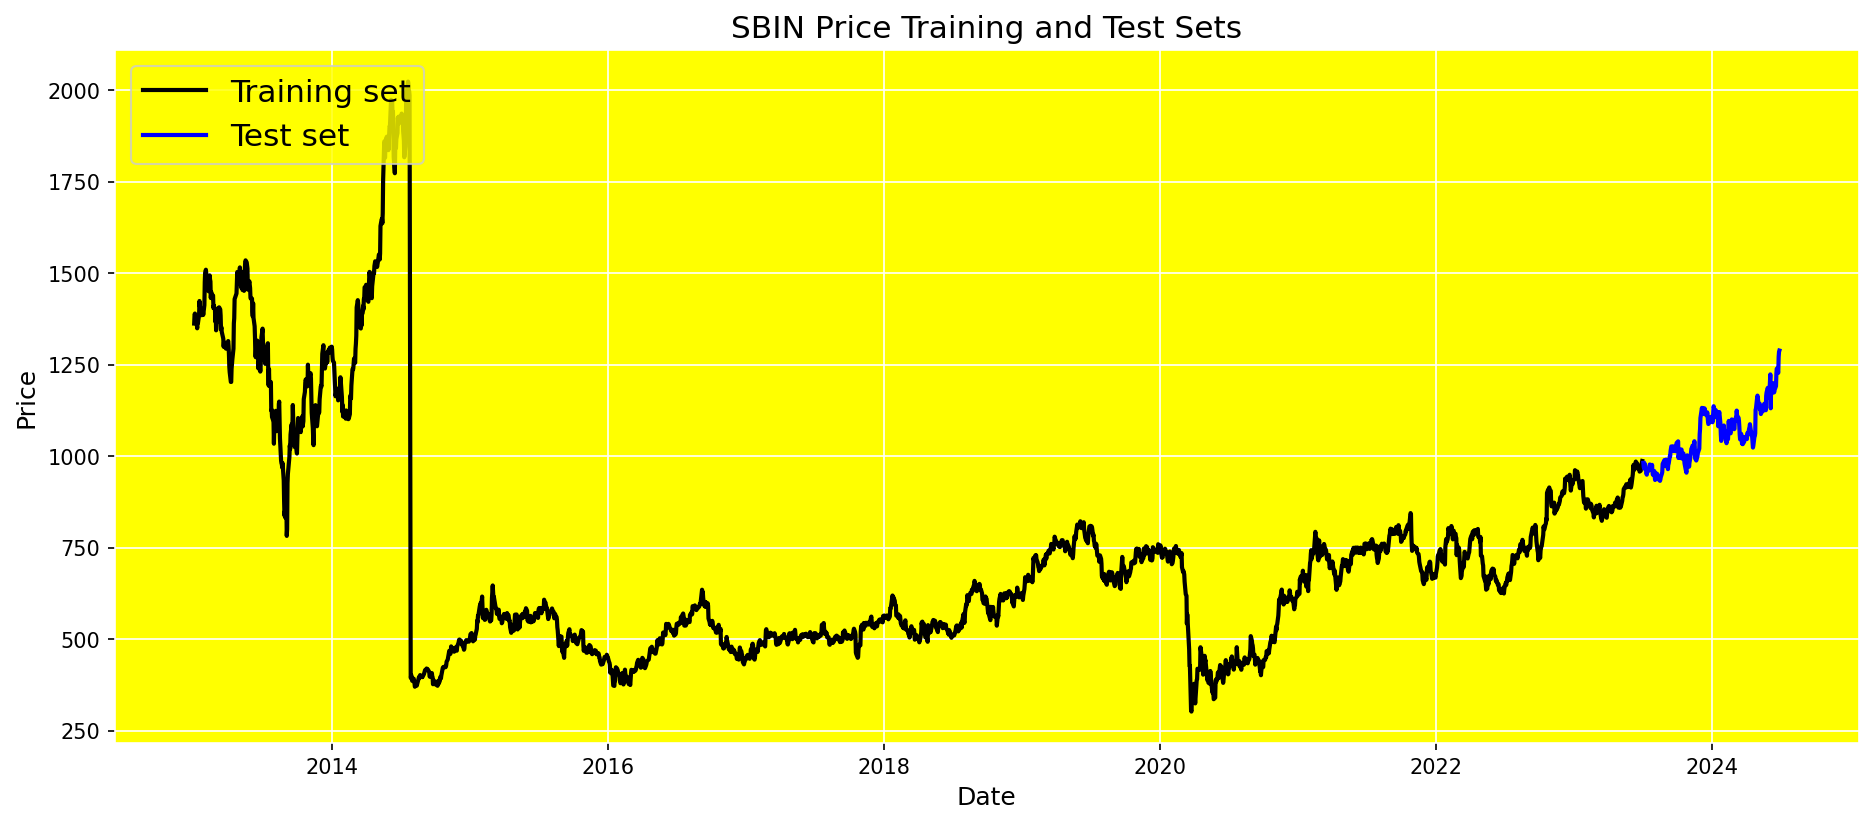

In [73]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df.DATE[:-test_size], df.CLOSE[:-test_size], color='black', lw=2)
plt.plot(df.DATE[-test_size:], df.CLOSE[-test_size:], color='blue', lw=2)
plt.title('SBIN Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [74]:
scaler = MinMaxScaler()
scaler.fit(df.CLOSE.values.reshape(-1,1))

MinMaxScaler()

In [75]:
window_size = 60

In [76]:
train_data = df.CLOSE[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [77]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [78]:
test_data = df.CLOSE[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [79]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [80]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [81]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [82]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (2536, 60, 1)
y_train Shape:  (2536, 1)
X_test Shape:   (246, 60, 1)
y_test Shape:   (246, 1)


In [83]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

In [84]:
model = define_model()
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0437 - val_loss: 0.0013
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0091 - val_loss: 0.0029
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0054 - val_loss: 0.0033
Epoch 4/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0038 - val_loss: 5.2109e-04
Epoch 5/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0037 - val_loss: 5.9075e-04
Epoch 6/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 7/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0028 - val_loss: 6.0741e-04
Epoch 8/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0019 - val_loss: 2.6140e-04
Epoch 9/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0023 - val_loss: 2.3962e-04
Epoch 10/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0022 - val_loss: 3.0463e-04
Epoch 11/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0017 - val_loss: 1.8951e-04
Epoch 12/200
72/72 ━━━━━

In [85]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.9408e-05
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [86]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [87]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.00011147330951644108
Test MAPE: 0.01798962069265772
Test Accuracy: 0.9820103793073423


In [88]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

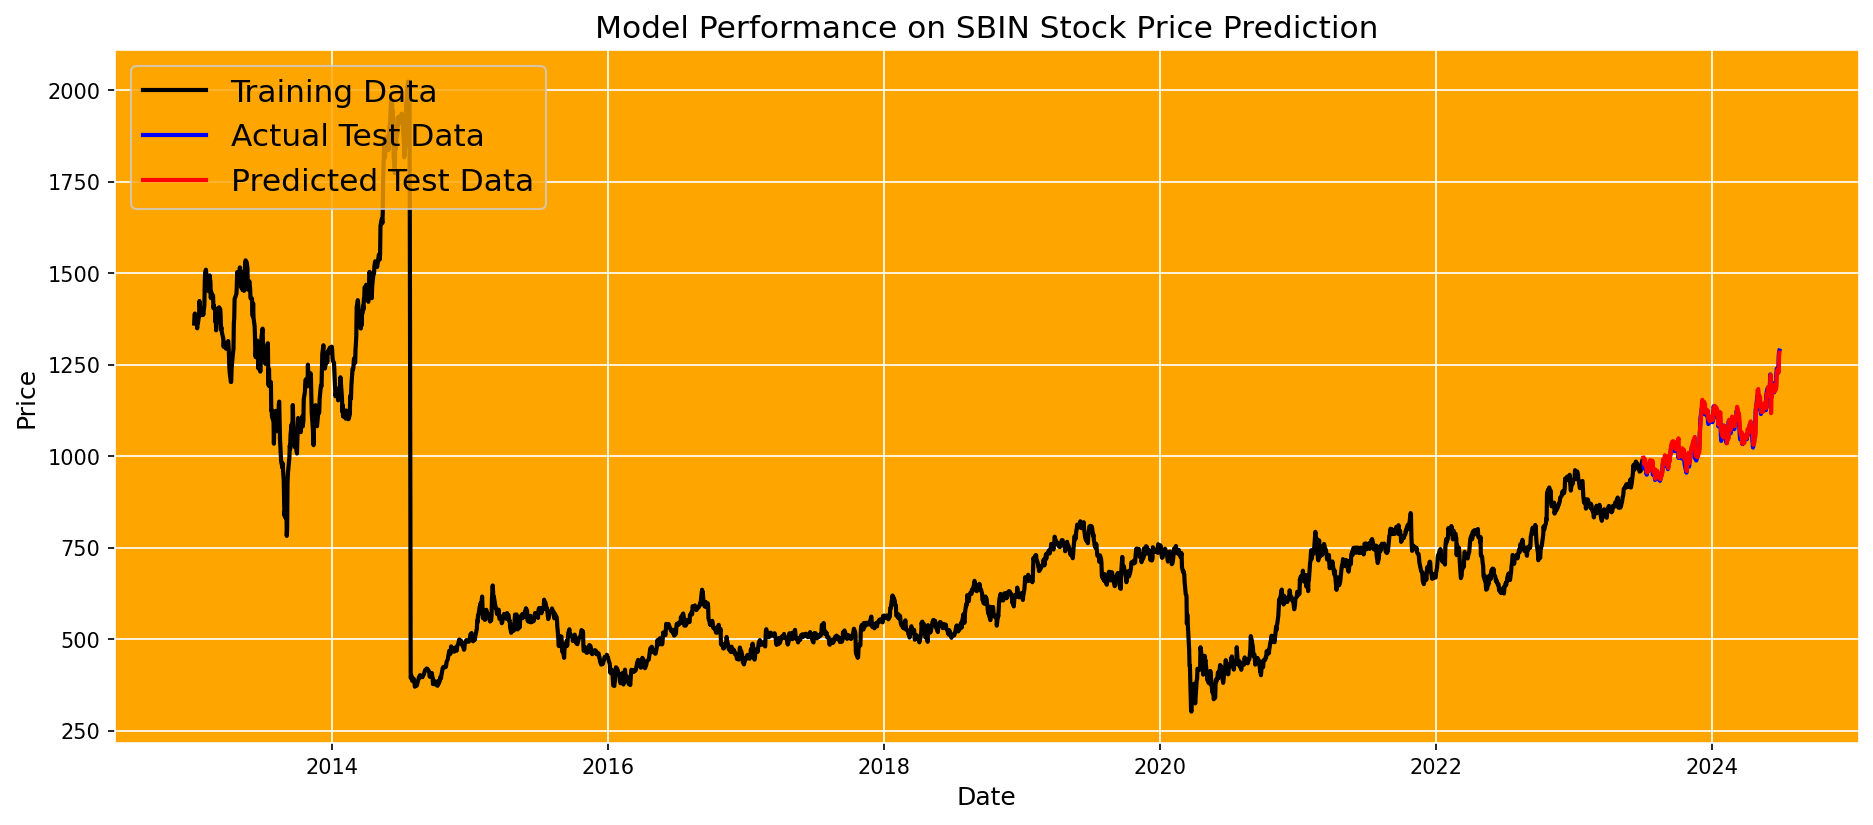

In [89]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'orange'
plt.rc('axes',edgecolor='white')
plt.plot(df['DATE'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['DATE'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['DATE'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on SBIN Stock Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [58]:
model.save("/home/ariyaman/learntocode/Stockipy/models/LSTM/StockPredictionModel_SBIN.keras")